<a href="https://colab.research.google.com/github/fora22/Data_Science/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 그래프 한글 폰트 설정
!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname = path, size = 10).get_name()
print(font_name)
plt.rc('font', family=font_name)  
fm._rebuild()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 다항 회귀(Polynomial Regression)

In [ ]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

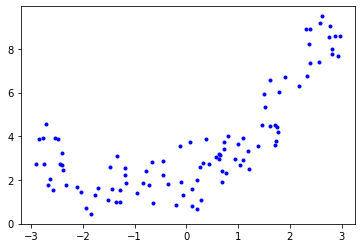

In [ ]:
plt.figure()
plt.plot(X, y, 'b.')

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)

In [ ]:
X[0]

array([1.7472583])

In [ ]:
X_poly[0] # ([x, X^2])

array([1.7472583 , 3.05291156])

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.03952118]), array([[0.9785258 , 0.49198343]]))

# 선형 학습 곡선

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth = 2, label = "훈련 세트")
    plt.plot(np.sqrt(val_errors), "b-", linewidth = 3, label = "검증 세트")

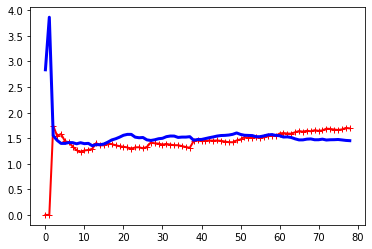

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

# 다항 학습 곡선

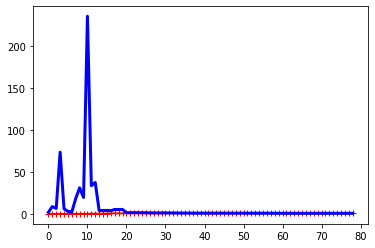

In [ ]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

- 과대적합을 감소시키는 좋은 방법은 모델을 규제하는 것
# 릿지 회귀
티호노프(Tikhonov) 규제

## 릿지 회귀의 비용 함수
$J(\theta) = MSE(\theta) + \alpha \frac{1}{2} \sum_{i=1}^N \theta_{i}^{2}$ 

## 릿지 회귀의 정규방정식
$\hat{\theta} (X^{T} \cdot X + \alpha A)^{-1}  \cdot X^{T} \cdot y $

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge_reg = Ridge(alpha = 1, solver="cholesky") # 숄레스티(Cholesky)가 발견한 행렬 분해 사용
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.99693591]])

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
sgd_reg = SGDRegressor(max_iter = 5, penalty = "l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([4.19432253])

# 라쏘(Lasso) 회귀
Lasso : Least Absolute Shrinkage and Selection Operator

## 라쏘 회귀의 비용 함수
$J(\theta) = MSE(\theta) + \alpha \sum_{i=1}^N |\theta_{i}|$ 

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso_reg = Lasso(alpha=0.1)
# sgd_reg = SGDRegressor(max_iter = 5, penalty = "l1")
lasso_reg.fit(X, y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
lasso_reg.predict([[1.5]])

array([4.95526388])

# 엘라스틱넷(Elastic Net) 회귀
- 릿지와 라쏘를 절충한 모델
- 혼합 비율 r을 사용해 조절
  - r = 0이면 릿지 회귀
  - r = 1이면 라쏘 회귀와 같다.

## 라쏘 회귀의 비용 함수
$J(\theta) = MSE(\theta) + r \alpha \sum_{i=1}^N |\theta_{i}| + \frac{1 - r}{2} \alpha \sum_{i=1}^N \theta_{i}^{2}$ 

# 보통의 경우
규제가 약간 있는 것이 대부분의 경우 좋으므로 릿지가 기본이 되지만, 실제로 쓰이는 특성이 몇 개 뿐이라고 의심되면 라쏘나 엘라스틱넷이 좋다. 이 모델들은 불필요한 특성의 가중치를 0으로 만들어준다.

특성 수가 훈련 샘플 수보다 많거나 특성 몇 개가 강하게 연관되어 있을 때는 보통 라쏘보다는 엘라스틱넷을 선호한다.

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5) # l1_ratio가 r이다.
elastic_net.fit(X,y)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
elastic_net.predict([[1.5]])

array([4.95650657])

# 조기 종료(Early Stopping)

조기 종료는 검증 에러가 최소에 도달하는 즉시 훈련을 멈추는 것이다.

In [ ]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# 데이터 준비
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler()) ])

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

In [ ]:
std_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None,  # n_iter는 최신 버전에서 max_iter로 바뀌었음
                       learning_rate = "constant", eta0=0.0005)

In [ ]:
minimum_val_error = float("inf")

In [ ]:
best_epoch = None
best_model = None

In [ ]:
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # 훈련을 이어서 진행합니다.
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr